# Assignment - Multiple Linear Regression

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr03.xls')
#data.head()

# we will get scores to array

EXAM1 = data['EXAM1'].values
EXAM2 = data['EXAM2'].values
EXAM3 = data['EXAM3'].values
FINAL = data['FINAL'].values

# Now we will generate our X, Y and β

m = len(EXAM1)
x0 = np.ones(m)
X_temp = np.array([x0,EXAM1,EXAM2, EXAM3])
X = np.array([x0,EXAM1, EXAM2, EXAM3]).T
# Initial Coefficients
B = np.array([0, 0, 0, 0])
Y = np.array(FINAL)
alpha = 0.0001

# cost function

def cost_function(X, Y, B):
    m = len(Y)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

inital_cost = cost_function(X, Y, B)
#print(inital_cost)


def gradient_descent(X, Y, B, alpha, iterations):
    cost_history = [0] * iterations
    m = len(Y)

    for iteration in range(iterations):
        # Hypothesis Values
        h = X.dot(B)
        # Difference b/w Hypothesis and Actual Y
        loss = h - Y
        # Gradient Calculation
        gradient = X.T.dot(loss) / m
        # Changing Values of B using Gradient
        B = B - alpha * gradient
        # New Cost Value
        cost = cost_function(X, Y, B)
        cost_history[iteration] = cost

    return B, cost_history

# Now we will compute final value of β

# 100000 Iterations
newB, cost_history = gradient_descent(X, Y, B, alpha, 100000)

# New Values of B
print(newB)

# Final Cost of new B
print(cost_history[-1])

# Model Evaluation - RMSE
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
    ss_tot = sum((Y - mean_y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB)

print(rmse(Y, Y_pred))
print(r2_score(Y, Y_pred))


*** No CODEPAGE record, no encoding_override: will use 'ascii'
[-0.75051754  0.3559765   0.5324549   1.13406669]
2.9928589276285904
2.4465726752453483
0.9892148916911163


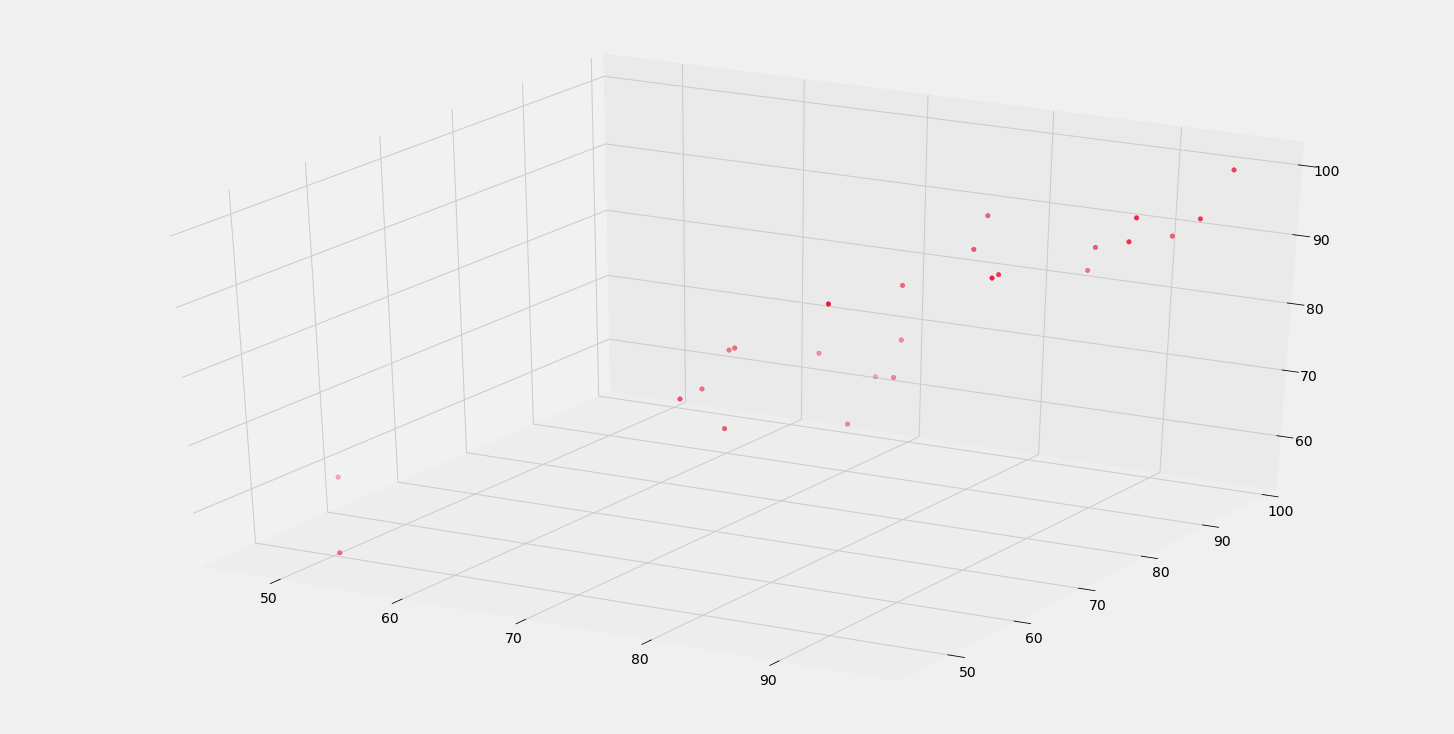

In [110]:
# Ploting the scores as scatter plot
fig = plt.figure()

ax = Axes3D(fig)
# ax.scatter3D(*data.T)
ax.scatter3D(EXAM1, EXAM2, EXAM3, FINAL, color='#ef1234')
# ax.plot3D(pd.to_numeric(Y_pred))
plt.show()


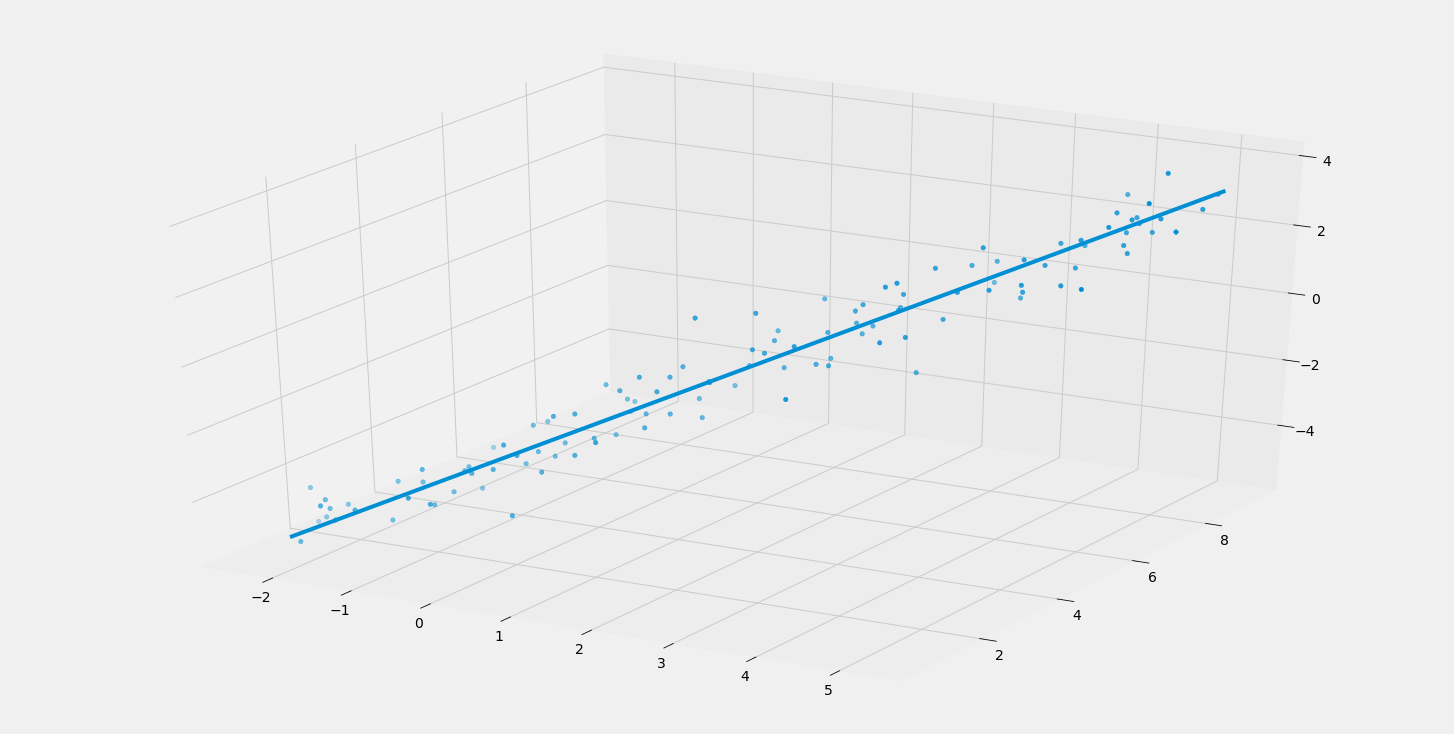

In [89]:
import numpy as np

# Generate some data that lies along a line

x = np.mgrid[-2:5:120j]
y = np.mgrid[1:9:120j]
z = np.mgrid[-5:3:120j]

data = np.concatenate((x[:, np.newaxis], 
                       y[:, np.newaxis], 
                       z[:, np.newaxis]), 
                      axis=1)

# Perturb with some Gaussian noise
data += np.random.normal(size=data.shape) * 0.4

# Calculate the mean of the points, i.e. the 'center' of the cloud
datamean = data.mean(axis=0)

# Do an SVD on the mean-centered data.
uu, dd, vv = np.linalg.svd(data - datamean)

# Now vv[0] contains the first principal component, i.e. the direction
# vector of the 'best fit' line in the least squares sense.

# Now generate some points along this best fit line, for plotting.

# I use -7, 7 since the spread of the data is roughly 14
# and we want it to have mean 0 (like the points we did
# the svd on). Also, it's a straight line, so we only need 2 points.
linepts = vv[0] * np.mgrid[-7:7:2j][:, np.newaxis]

# shift by the mean to get the line in the right place
linepts += datamean

# Verify that everything looks right.

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as m3d

ax = m3d.Axes3D(plt.figure())
ax.scatter3D(*data.T)
ax.plot3D(*linepts.T)
plt.show()

In [101]:
Y_pred.reshape(3,1,)

array([152.88716076, 184.67953035, 181.450789  , 199.0104757 ,
       139.76245866, 104.98283032, 150.53665874, 113.84185383,
       174.34937718, 164.44133771, 143.87057236, 142.69834104,
       186.13858128, 152.75488634, 151.49424703, 188.61418533,
       144.06630187, 181.47272221, 177.09100063, 158.53254132,
       176.29667902, 174.45669869, 167.60507486, 151.01618818,
       190.67786773])

In [ ]:
#https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr04.xls
    